In [1]:
from ROOT import TCanvas
from ROOT import TH1F
from ROOT import gStyle
from array import array
import math
import random

c1 = TCanvas( 'c1', 'Simple Integration Example', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.18/00


In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

In [3]:
gStyle.SetOptFit(1)
h1 = TH1F("h1","h1",100,-0.05,0.05)

In [4]:
random.seed(1)

In [5]:
niter = 100
npoints = 100000
xlow = 0.0
xhigh = 1.0
dx = (xhigh-xlow)/npoints

error = 0.0
for j in range(0,niter):
    sum_iter = 0.0
    sigma_iter = 0.0

    for i in range(0,npoints):
        xval = xlow+random.random()*(xhigh-xlow)
        yval = generator_function(xval)
        sum_iter = sum_iter + dx*yval
        sigma_iter = sigma_iter + yval*yval
        
    error = error + math.sqrt(sigma_iter/npoints - sum_iter*sum_iter)/math.sqrt(npoints)
    h1.Fill(1.0-sum_iter)

print("Error Upper Bound = %f" % (error/niter))

Error = 0.001414


 FCN=6.4877 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=1.06408e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.07191e+01   4.58335e+00   4.24448e-03  -4.75185e-05
   2  Mean         8.41634e-05   1.32442e-04   1.73952e-07   9.95647e-06
   3  Sigma        1.22350e-03   1.38728e-04   3.42341e-05   7.49846e-03


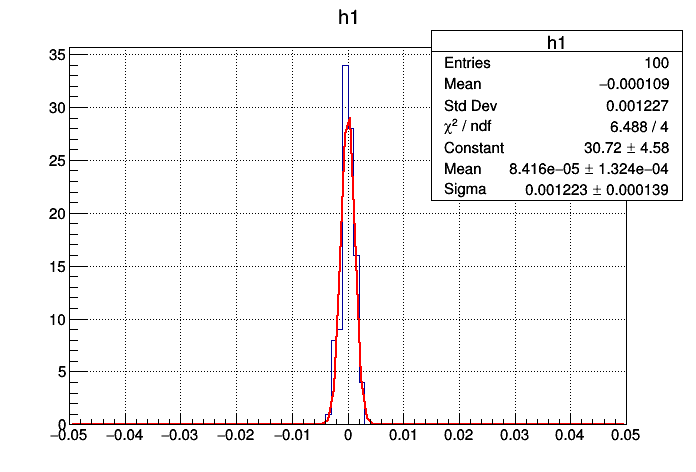

In [6]:
h1.Draw()
h1.Fit("gaus")
c1.Draw()